In [1]:
import sys
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(123)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ChangePoint.ShiryaevRoberts_CPD import compute_SR_mean
from CondEnt.CondEnt_RFCDE import multivariate_EWS
from utils import plot_SR_synthetic_data

# Vizualize the data

In [2]:
df = pd.read_csv(module_path + '/Data/df_cond_ent.csv')
df = df[df.columns[1:]]
df['Date'] = pd.to_datetime(df['Date'])

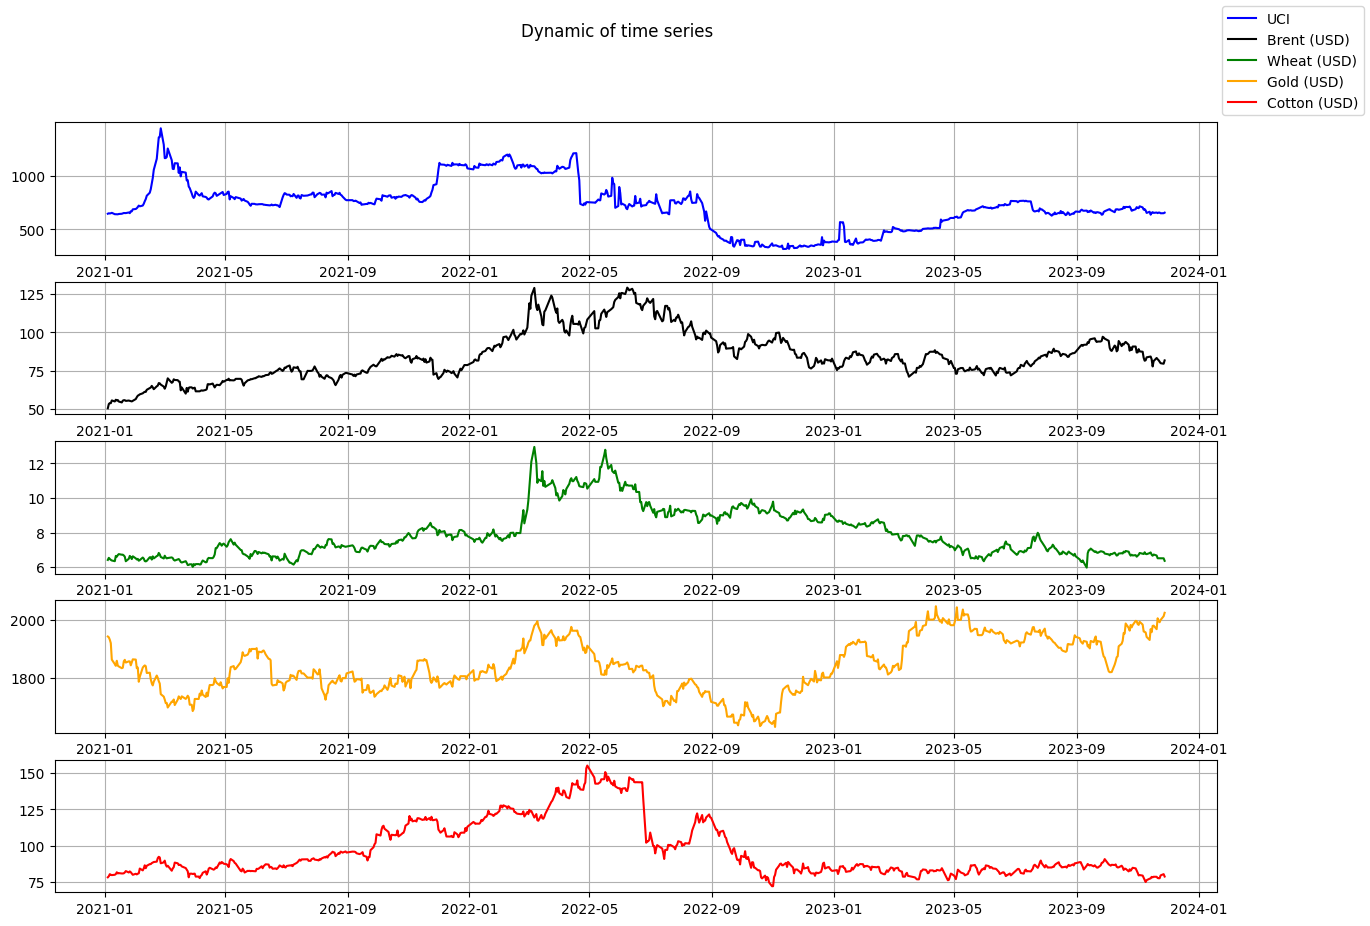

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
fig.suptitle('Dynamic of time series')
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.plot(df.Date, df.UCI, color = 'Blue', label = 'UCI')
ax2.plot(df.Date, df.Brent, color = 'Black', label = 'Brent (USD)')
ax3.plot(df.Date, df.Wheat, color = 'Green', label = 'Wheat (USD)')
ax4.plot(df.Date, df.Gold, color = 'Orange', label = 'Gold (USD)')
ax5.plot(df.Date, df.Cotton, color = 'Red', label = 'Cotton (USD)')

ax1.grid(), ax2.grid(), ax3.grid(), ax4.grid(), ax5.grid()

fig.legend()
plt.show()

In [17]:
# Define an EWS
EWS = multivariate_EWS(1)

# Define the width of sliding window
ww = 100

# Fit linear model (LR) without ranks
ent_res_lin = EWS.Est_Cond_Entropy_linear(df,
                                       'UCI',
                                      ['Brent', 'Gold', 'Wheat', 'Cotton'], 
                                      step = 1, 
                                      use_ranks=False,
                                      verbose = False, 
                                      bandwidth='auto', 
                                      n_grid=100, 
                                      n_trees=1000, 
                                      node_size=5, 
                                      window_size=ww, 
                                      n_basis=50, 
                                      fit_type='jointly')

# Fit local linear forest (LLF) without ranks
ent_res_llf = EWS.Est_Cond_Entropy_LLF(df,
                                       'UCI',
                                      ['Brent', 'Gold', 'Wheat', 'Cotton'],
                                        step = 1, 
                                        use_ranks=False,
                                        verbose = False, 
                                        bandwidth='auto', 
                                        n_grid=100, 
                                        n_trees_RFCDE=1000, 
                                        node_size=5, 
                                        window_size=ww, 
                                        n_basis=50, 
                                        fit_type='jointly',
                                        n_trees_LLF=1000,
                                        ll_split_weight_penalty=False,
                                        ll_split_lambda=0.2,
                                        ll_split_variables=None,
                                        ll_split_cutoff=None,
                                        equalize_cluster_weights=False,
                                        sample_fraction=0.5,
                                        min_node_size=2,
                                        honesty=True,
                                        honesty_fraction=0.15,
                                        honesty_prune_leaves=True,
                                        alpha=0.15,
                                        imbalance_penalty=0,
                                        ci_group_size=2,
                                        n_jobs=-1,
                                        seed=42,
                                        enable_tree_details=False)

# Fit linear model (LR) with ranks
ent_res_lin_r = EWS.Est_Cond_Entropy_linear(df,
                                       'UCI',
                                      ['Brent', 'Gold', 'Wheat', 'Cotton'], 
                                      step = 1, 
                                      use_ranks=True,
                                      verbose = False, 
                                      bandwidth='auto', 
                                      n_grid=100, 
                                      n_trees=1000, 
                                      node_size=5, 
                                      window_size=ww, 
                                      n_basis=50, 
                                      fit_type='jointly')

# Fit local linear forest (LLF) with ranks
ent_res_llf_r = EWS.Est_Cond_Entropy_LLF(df,
                                       'UCI',
                                      ['Brent', 'Gold', 'Wheat', 'Cotton'],
                                        step = 1, 
                                        use_ranks=True,
                                        verbose = False, 
                                        bandwidth='auto', 
                                        n_grid=100, 
                                        n_trees_RFCDE=1000, 
                                        node_size=5, 
                                        window_size=ww, 
                                        n_basis=50, 
                                        fit_type='jointly',
                                        n_trees_LLF=1000,
                                        ll_split_weight_penalty=False,
                                        ll_split_lambda=0.2,
                                        ll_split_variables=None,
                                        ll_split_cutoff=None,
                                        equalize_cluster_weights=False,
                                        sample_fraction=0.5,
                                        min_node_size=2,
                                        honesty=True,
                                        honesty_fraction=0.15,
                                        honesty_prune_leaves=True,
                                        alpha=0.15,
                                        imbalance_penalty=0,
                                        ci_group_size=2,
                                        n_jobs=-1,
                                        seed=42,
                                        enable_tree_details=False)



# Conditional entropies for variables

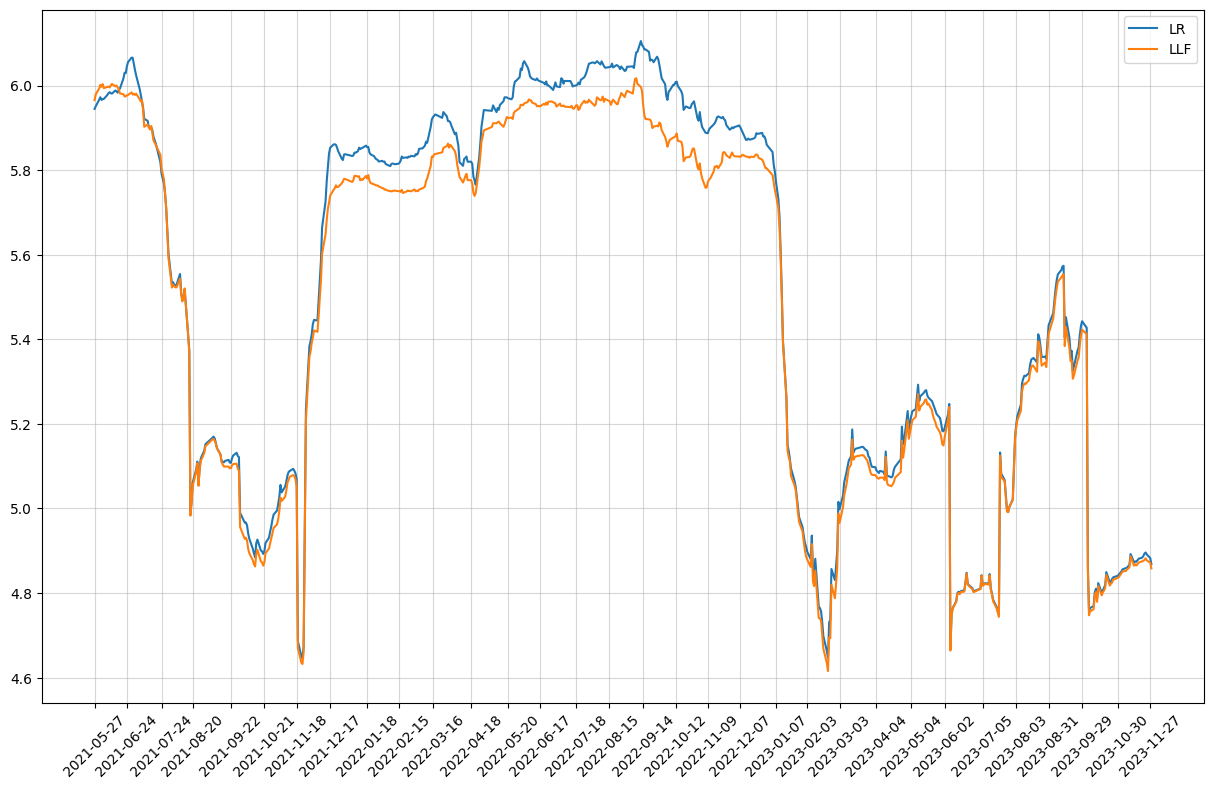

In [25]:
ww = 100
ticks_for_plot = df['Date'][ww:]
ticks_for_plot = ticks_for_plot[::20]

plt.figure(figsize = (15,9))
plt.plot(df['Date'][ww:], ent_res_lin, label = 'LR')
plt.plot(df['Date'][ww:], ent_res_llf, label = 'LLF')
plt.xticks(rotation = 45, ticks=ticks_for_plot)
plt.grid(alpha = .5)
plt.legend()
plt.show()


# Conditional entropies for ranks

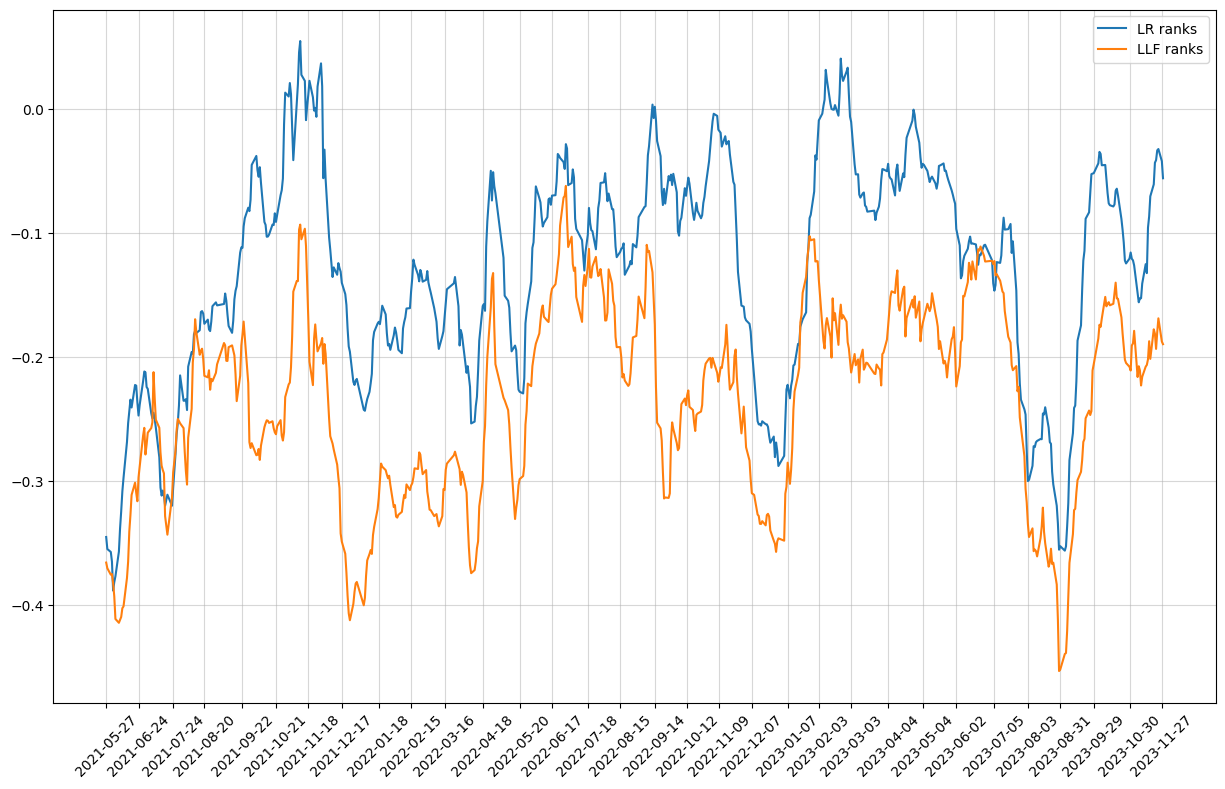

In [26]:
ticks_for_plot = df['Date'][100:]
ticks_for_plot = ticks_for_plot[::20]

plt.figure(figsize = (15,9))
plt.plot(df['Date'][100:], ent_res_lin_r, label = 'LR ranks')
plt.plot(df['Date'][100:], ent_res_llf_r, label = 'LLF ranks')
plt.xticks(rotation = 45, ticks=ticks_for_plot)
plt.grid(alpha = .5)
plt.legend()
plt.show()

# Apply Shiryaev-Roberts procedure for unknown mean drift 

In [27]:
SR_stat_lin = compute_SR_mean(ent_res_lin,
                                mean_diff=[-0.3, -0.2, -0.1, 0.1, 0.2, 0.3],
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

SR_stat_llf = compute_SR_mean(ent_res_llf,
                                mean_diff=[-0.3, -0.2, -0.1, 0.1, 0.2, 0.3],
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

SR_stat_lin_r = compute_SR_mean(ent_res_lin_r,
                                mean_diff=[-0.3, -0.2, -0.1, 0.1, 0.2, 0.3],
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

SR_stat_llf_r = compute_SR_mean(ent_res_llf_r,
                                mean_diff=[-0.3, -0.2, -0.1, 0.1, 0.2, 0.3],
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

## Linear model

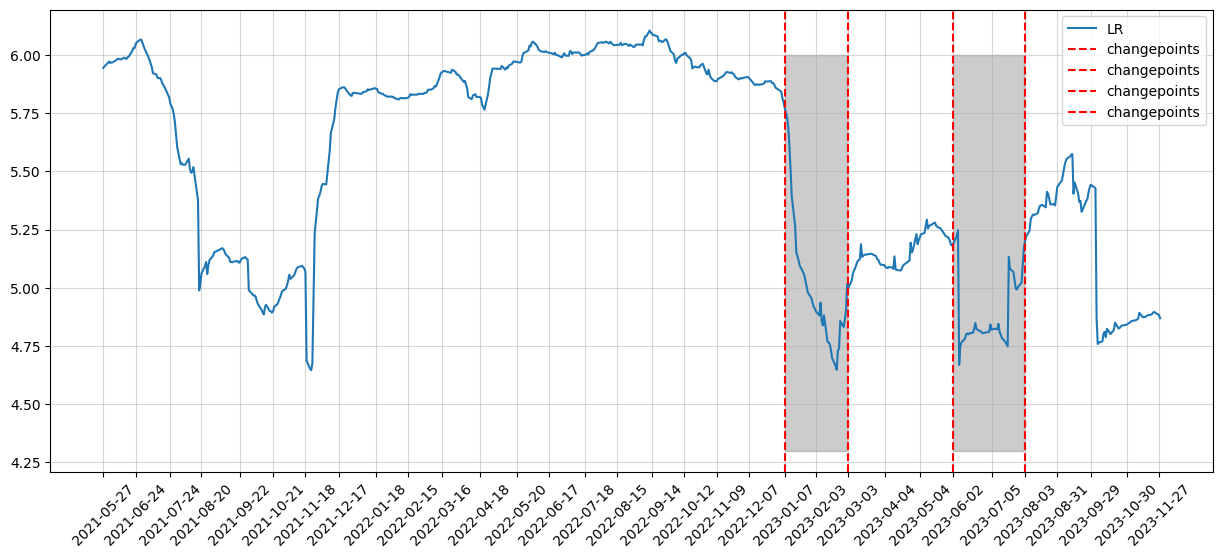

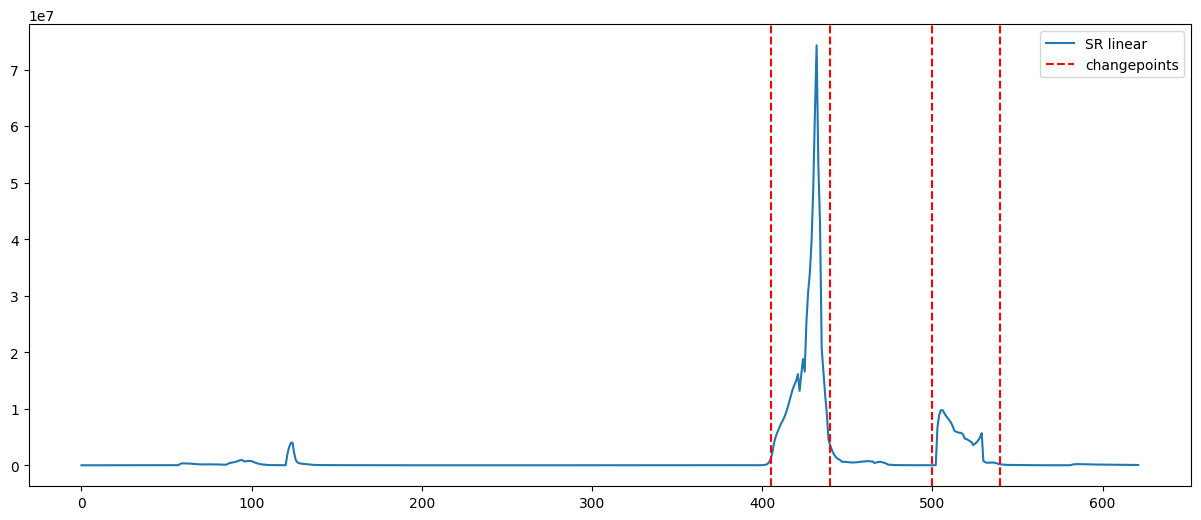

In [35]:
ww = 100
ticks_for_plot = df['Date'][ww:]
ticks_for_plot = ticks_for_plot[::20]

plt.figure(figsize = (15,6))
plt.plot(df['Date'][ww:], ent_res_lin, label = 'LR')
plt.fill_between(df['Date'][400 + ww: 440 + ww], y1=[6]*40, y2 = [4.3]*40, color = 'grey', alpha = .4)
plt.fill_between(df['Date'][500 + ww:540+ww], y1=[6]*(540-500), y2 = [4.3]*(540-500), color = 'grey', alpha = .4)
plt.axvline(df['Date'][400 + ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(df['Date'][440 + ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(df['Date'][500 + ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(df['Date'][540 + ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.xticks(rotation = 45, ticks=ticks_for_plot)
plt.grid(alpha = .5)
plt.legend()
plt.show()


plt.figure(figsize = (15,6))
plt.plot(SR_stat_lin, label = 'SR linear')
plt.axvline(405, label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(440, color = 'red', linestyle = '--')
plt.axvline(500, color = 'red', linestyle = '--')
plt.axvline(540, color = 'red', linestyle = '--')
plt.legend()


## LLF model

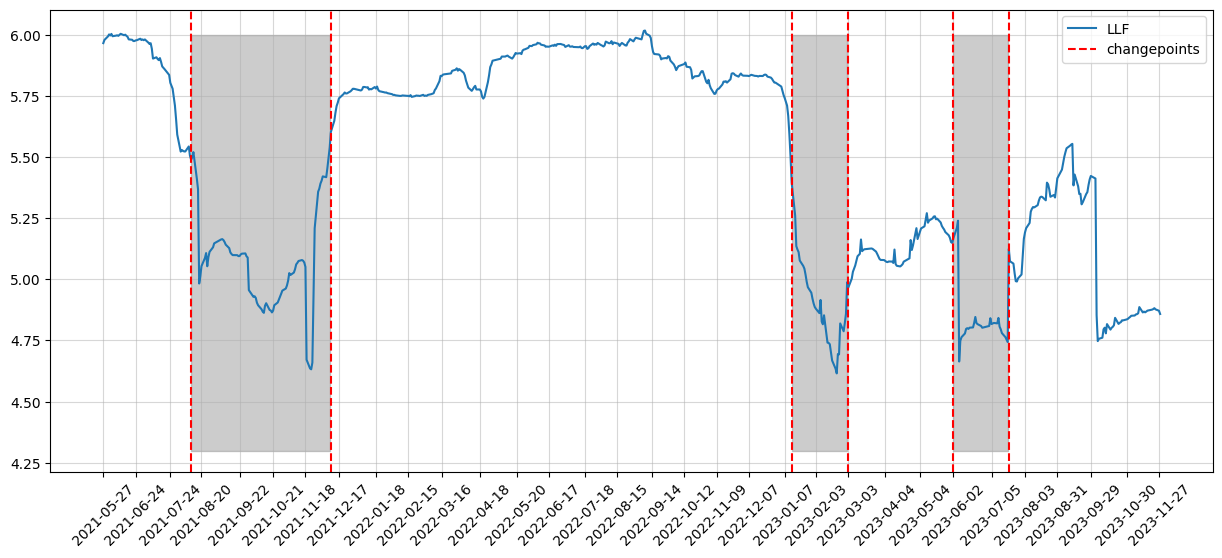

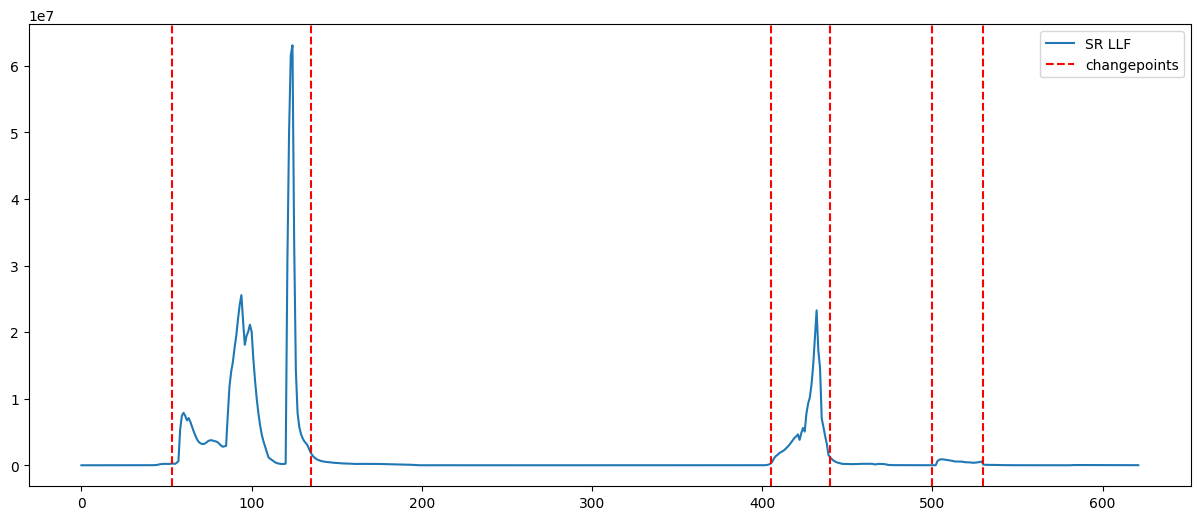

In [36]:
ww = 100
ticks_for_plot = df['Date'][ww:]
ticks_for_plot = ticks_for_plot[::20]

plt.figure(figsize = (15,6))
plt.plot(df['Date'][ww:], ent_res_llf, label = 'LLF')
plt.fill_between(df['Date'][53 + ww:135 + ww:], y1=[6]*(135-53), y2 = [4.3]*(135-53), color = 'grey', alpha = .4)
plt.fill_between(df['Date'][405 + ww: 440 + ww], y1=[6]*35, y2 = [4.3]*35, color = 'grey', alpha = .4)
plt.fill_between(df['Date'][500 + ww: 530 + ww], y1=[6]*30, y2 = [4.3]*30, color = 'grey', alpha = .4)
plt.axvline(df['Date'][53+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][135+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][405+ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(df['Date'][440+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][500+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][530+ww], color = 'red', linestyle = '--')
plt.xticks(rotation = 45, ticks=ticks_for_plot)
plt.grid(alpha = .5)
plt.legend()
plt.show()

plt.figure(figsize = (15,6))
plt.plot(SR_stat_llf, label = 'SR LLF')
plt.axvline(53, color = 'red', linestyle = '--')
plt.axvline(135, color = 'red', linestyle = '--')
plt.axvline(405, label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(440, color = 'red', linestyle = '--')
plt.axvline(500, color = 'red', linestyle = '--')
plt.axvline(530, color = 'red', linestyle = '--')
plt.legend()



## Linear model for ranks

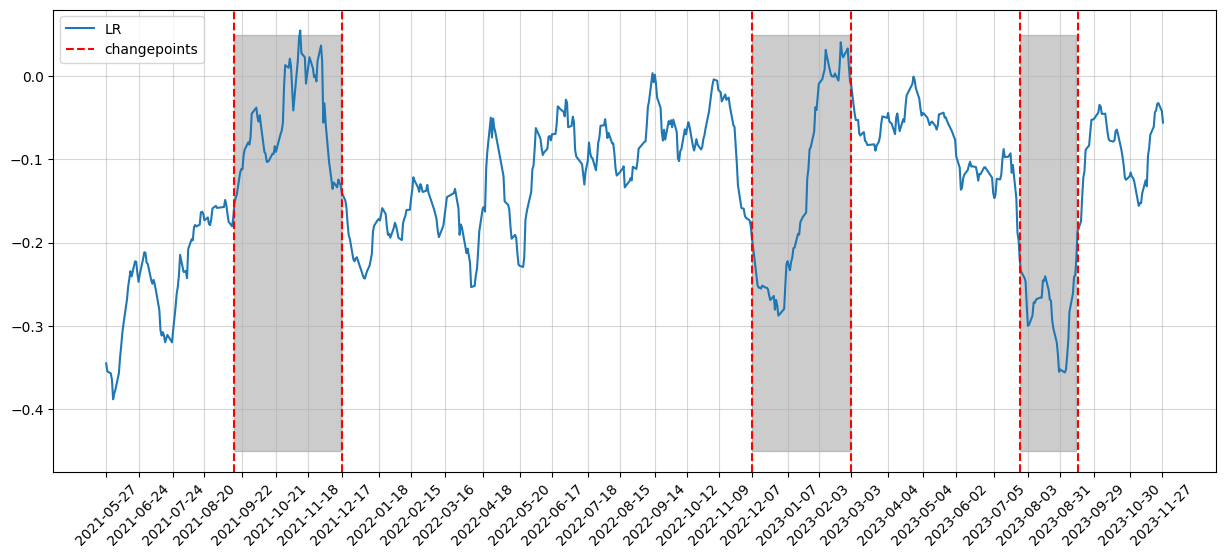

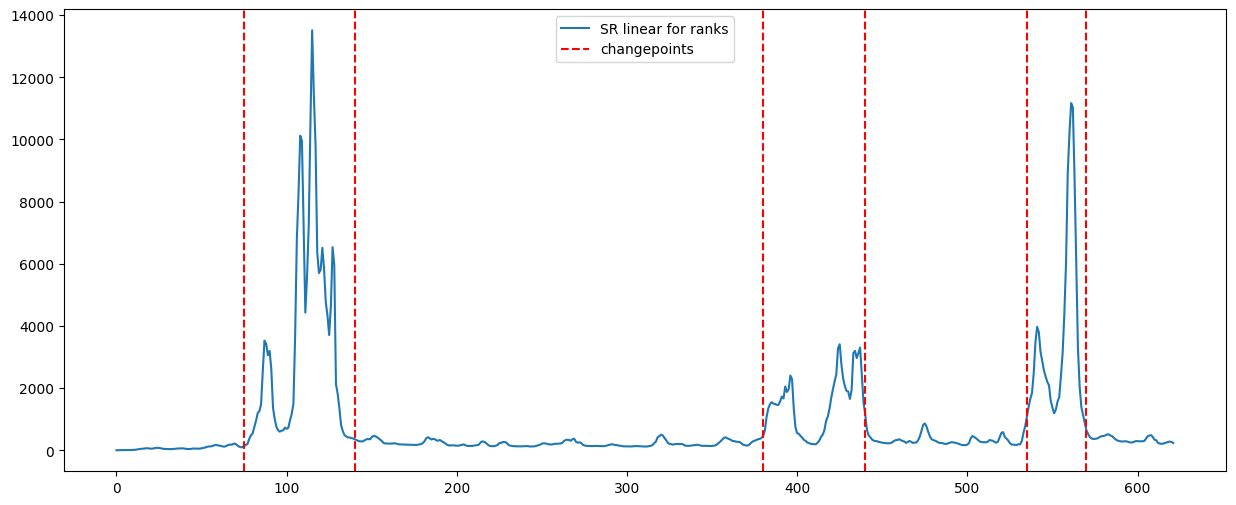

In [37]:
ww = 100
ticks_for_plot = df['Date'][ww:]
ticks_for_plot = ticks_for_plot[::20]

plt.figure(figsize = (15,6))
plt.plot(df['Date'][ww:], ent_res_lin_r, label = 'LR')
plt.fill_between(df['Date'][75 + ww: 140 + ww], y1=[-0.45]*65, y2 = [0.05]*65, color = 'grey', alpha = .4)
plt.fill_between(df['Date'][380 + ww:440+ww], y1=[-0.45]*(440-380), y2 = [0.05]*(440-380), color = 'grey', alpha = .4)
plt.fill_between(df['Date'][535 + ww:570+ww], y1=[-0.45]*35, y2 = [0.05]*35, color = 'grey', alpha = .4)
plt.axvline(df['Date'][75+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][140+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][380+ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(df['Date'][440+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][535+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][570+ww], color = 'red', linestyle = '--')
plt.xticks(rotation = 45, ticks=ticks_for_plot)
plt.grid(alpha = .5)
plt.legend()
plt.show()


plt.figure(figsize = (15,6))
plt.plot(SR_stat_lin_r, label = 'SR linear for ranks')
plt.axvline(75, color = 'red', linestyle = '--')
plt.axvline(140, color = 'red', linestyle = '--')
plt.axvline(380, label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(440, color = 'red', linestyle = '--')
plt.axvline(535, color = 'red', linestyle = '--')
plt.axvline(570, color = 'red', linestyle = '--')
plt.legend()

## LLF for ranks

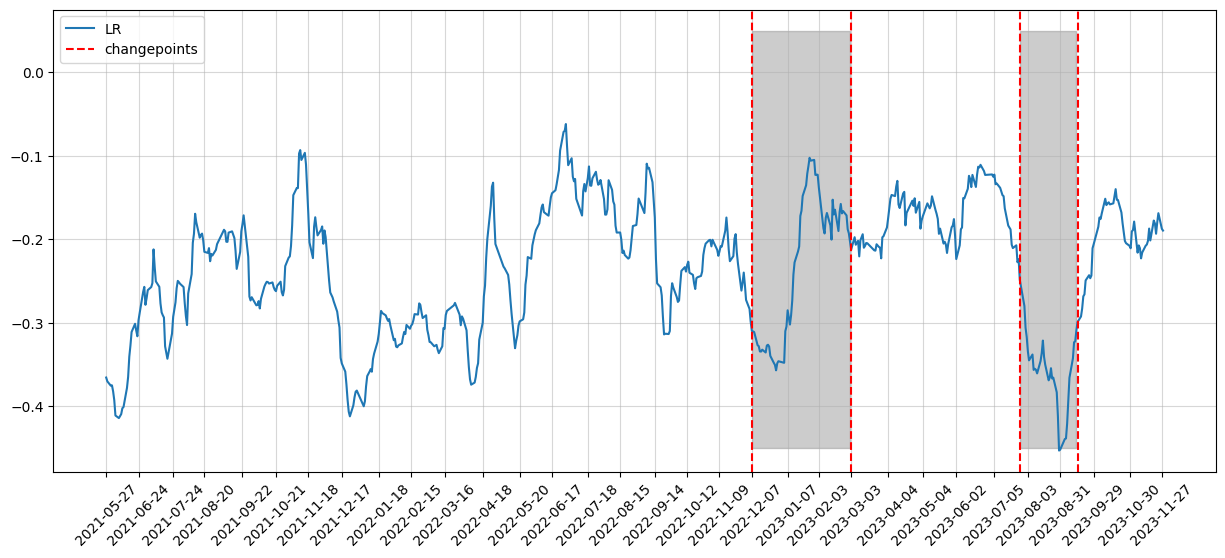

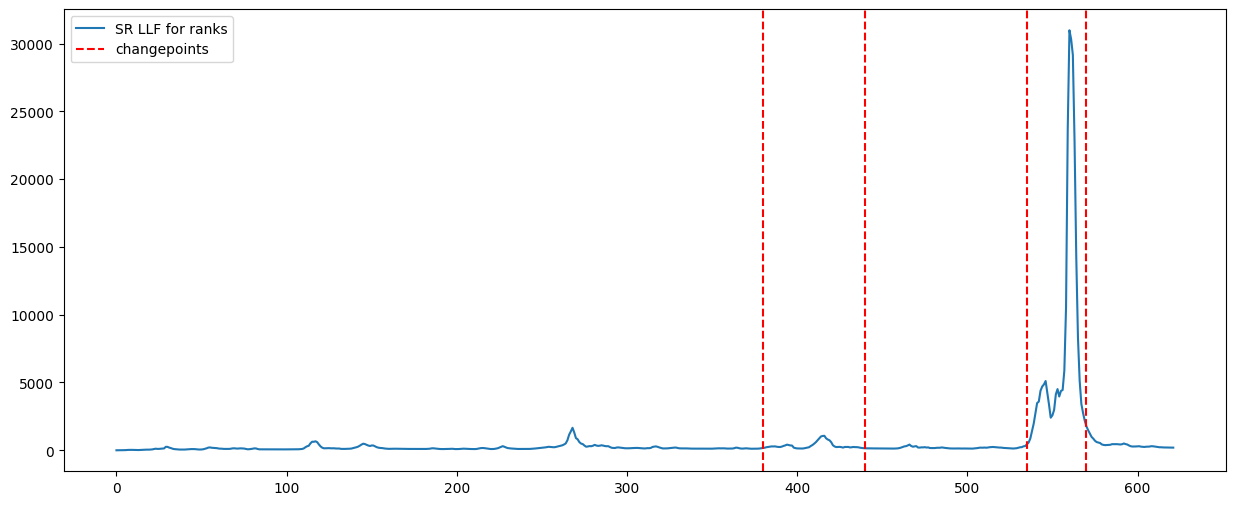

In [38]:
ww = 100
ticks_for_plot = df['Date'][ww:]
ticks_for_plot = ticks_for_plot[::20]

plt.figure(figsize = (15,6))
plt.plot(df['Date'][ww:], ent_res_llf_r, label = 'LR')
plt.fill_between(df['Date'][380 + ww:440+ww], y1=[-0.45]*(440-380), y2 = [0.05]*(440-380), color = 'grey', alpha = .4)
plt.fill_between(df['Date'][535 + ww:570+ww], y1=[-0.45]*35, y2 = [0.05]*35, color = 'grey', alpha = .4)

plt.axvline(df['Date'][380+ww], label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(df['Date'][440+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][535+ww], color = 'red', linestyle = '--')
plt.axvline(df['Date'][570+ww], color = 'red', linestyle = '--')

plt.xticks(rotation = 45, ticks=ticks_for_plot)
plt.grid(alpha = .5)
plt.legend()
plt.show()


plt.figure(figsize = (15,6))
plt.plot(SR_stat_llf_r, label = 'SR LLF for ranks')
plt.axvline(380, label = 'changepoints', color = 'red', linestyle = '--')
plt.axvline(440, color = 'red', linestyle = '--')
plt.axvline(535, color = 'red', linestyle = '--')
plt.axvline(570, color = 'red', linestyle = '--')
plt.legend()
plt.show()